# Разведочный анализ данных

## Задание:
- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
- Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
- Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

- Создать ноутбук, который содержит следующие разделы:
1. Текстовое описание выбранного Вами набора данных.
2. Основные характеристики датасета.
3. Визуальное исследование датасета.
4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на github.

## 1) Текстовое описание набора данных

В качестве набора данных будем использовать датасет в котором содержится информация об оценках учеников одной американской школы.
Файл StudentsPerformance.csv содержит следующие колонки:
- gender - пол ребенка
- race/ethnicity - национальность
- parental level of education - уровень образования родителей
- lunch - наличие платного питания
- test preparation course - проходил ли дополнительный курс подготовки
- math score - оценка по математике
- reading score - оценка по чтению
- writing score - оценка за сочинение

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

## 2) Основные характеристики датасета

In [4]:
#Отобразим первые 5 строк датасета:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
#Определим размер датасета
size = df.shape
print("Итого строк: {}".format(size[0]))
print("Итого столбцов: {}".format(size[1]))

Итого строк: 1000
Итого столбцов: 8


In [6]:
#Список колонок с типами данных
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
#Проверка на наличие пустых значений
for col in df.columns:
    temp = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp))

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


In [8]:
#Найдём основные статичтические характеристики набора данных
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3) Визуальное исследование датасета

### Диаграмма расеяния

<AxesSubplot:xlabel='math score', ylabel='writing score'>

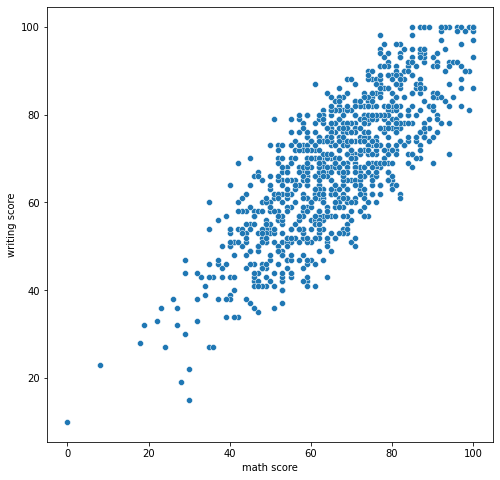

In [17]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='math score', y='writing score', data=df) #

<AxesSubplot:xlabel='writing score', ylabel='reading score'>

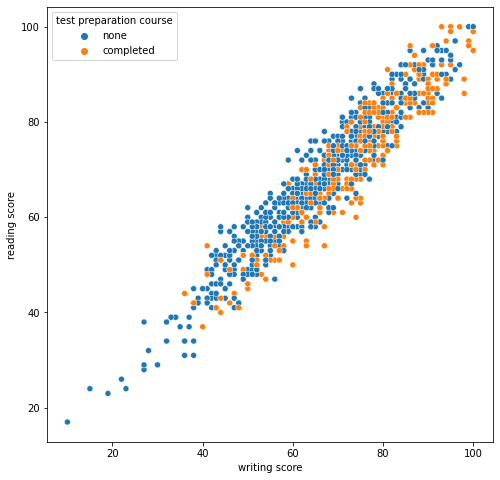

In [21]:
#оценки по сочинению и чтению с пометкой о прохождении доп подготовки
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='writing score', y='reading score', data=df, hue='test preparation course') #

### Гистограмма

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

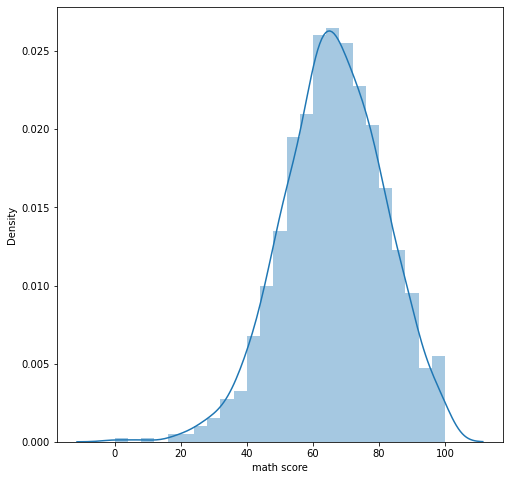

In [22]:
#Оценим распределение оценок с помощью гистограммы
fig, ax = plt.subplots(figsize=(8,8)) 
sns.distplot(df["math score"])

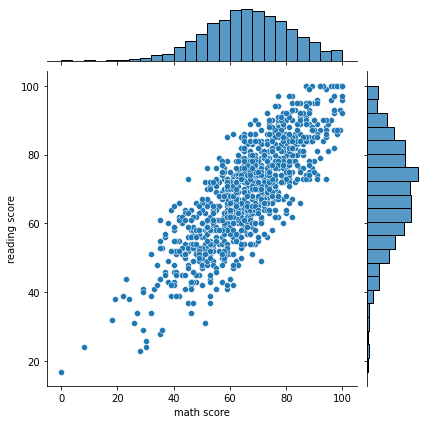

In [23]:
#Комбинация гистограмм и диаграмм рассеивания
sns.jointplot(x='math score', y='reading score', data=df)

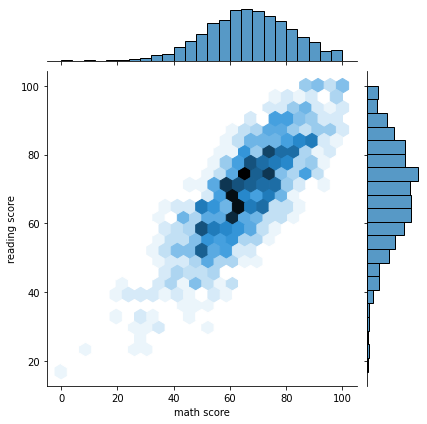

In [24]:
sns.jointplot(x='math score', y='reading score', data=df, kind="hex")

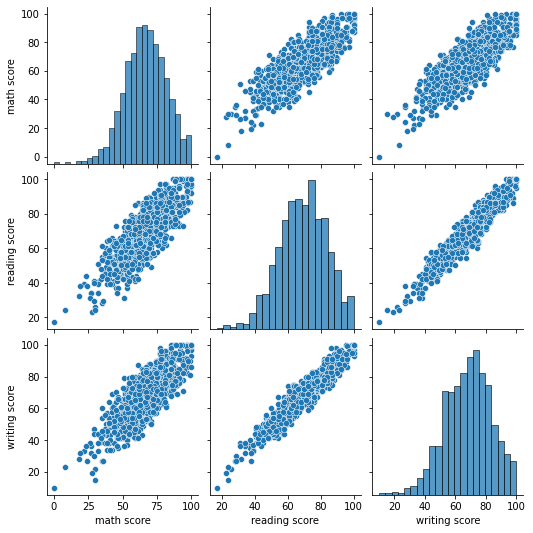

In [25]:
#Парные диаграммы
sns.pairplot(df)

### Ящик с усами

<AxesSubplot:xlabel='math score'>

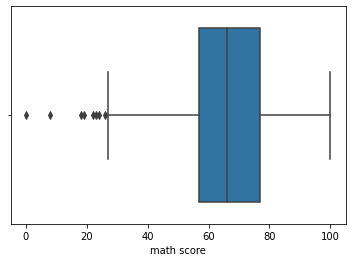

In [26]:
sns.boxplot(x=df["math score"])

<AxesSubplot:xlabel='math score', ylabel='lunch'>

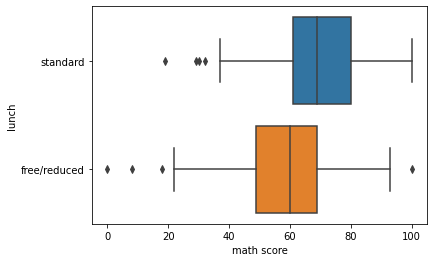

In [29]:
sns.boxplot(x="math score", y="lunch", data=df)

### Violin plot

<AxesSubplot:xlabel='writing score'>

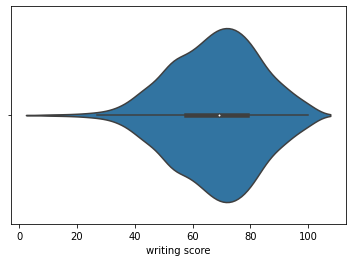

In [30]:
sns.violinplot(x=df["writing score"])

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

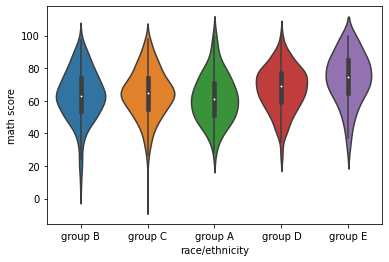

In [33]:
sns.violinplot(y="math score", x="race/ethnicity", data=df)

## 4) Информация о корреляции признаков

In [34]:
#Корреляция по критерию Пирсона
df.corr(method="pearson")

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [35]:
#Корреляция Кендалла
df.corr(method="kendall")

,math score,reading score,writing score
math score,1.000000,0.617432,0.591067
reading score,0.617432,1.000000,0.820058
writing score,0.591067,0.820058,1.000000


In [36]:
#Корреляция Спирмена
df.corr(method="spearman")

,math score,reading score,writing score
math score,1.000000,0.804064,0.778339
reading score,0.804064,1.000000,0.948953
writing score,0.778339,0.948953,1.000000


<AxesSubplot:>

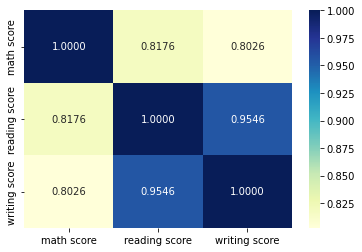

In [37]:
#Визуализация корреляционной матрицы
sns.heatmap(df.corr(), annot=True, fmt=".4f", cmap="YlGnBu")

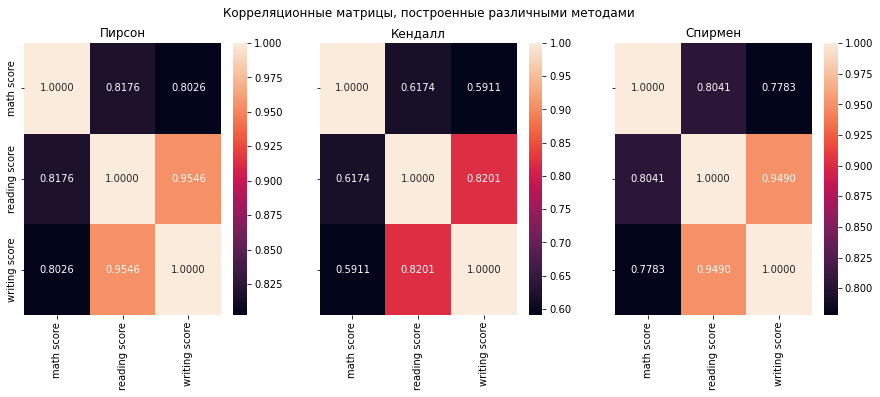

In [38]:
fig, ax = plt.subplots(1, 3, sharex="col", sharey="row", figsize=(15,5))
sns.heatmap(df.corr(method="pearson"), ax=ax[0], annot=True, fmt=".4f")
sns.heatmap(df.corr(method="kendall"), ax=ax[1], annot=True, fmt=".4f")
sns.heatmap(df.corr(method="spearman"), ax=ax[2], annot=True, fmt=".4f")
fig.suptitle("Корреляционные матрицы, построенные различными методами")
ax[0].title.set_text("Пирсон")
ax[1].title.set_text("Кендалл")
ax[2].title.set_text("Спирмен")